#### [문제, 60분] 아래 5개 유형의 DNN 아키텍처 중 반드시 하나만을 선택하여 구현하고 예측하시오.   

- **1번 유형:** 기본 5점부여, 성능 10점 만점   
<img src='http://drive.google.com/uc?export=view&id=18l1rC4PqyN8hCMPCyuS72AnCvSXa7ozI' /><br>   
 
- **2번 유형:** 기본 5점부여, 성능 10점 만점   
<img src='http://drive.google.com/uc?export=view&id=1NNJcM0H79dF7vVqpKXBV-YMIh00cRyMX' /><br>   
   
- **3번 유형:** 기본 6점부여, 성능 9점 만점    
<img src='http://drive.google.com/uc?export=view&id=1KfqA6lONzZZQ-o_bDjT7a_PyFfmrVXX8' /><br><br>   

<font color="#CC3D3D"><p>
**<유의사항, 정독 후 문제를 풀 것!!!>**
- DNN 아키텍처 별로 성능을 상대평가합니다. 단, 위의 DNN 아키텍처 중 어느것도 사용하지 않은 경우는 모두 "기타그룹"으로 묶어 상대평가합니다. 
- 제시한 아키텍처를 확장하는 것은 가능하나 축소하거나 변형하는 것은 허용되지 않습니다. 단, 확장여부는 담당교수의 승인을 얻어야합니다.   
- 기본점수는 제시한 아키텍처를 정확히 구현했을 때만 부여되며, 그렇지 않은 경우는 "기타그룹"으로 묶어 상대평가합니다. 
- "기타그룹"은 만점이 10점이고 기본점수가 없습니다.
- 성능점수는 아키텍처별 성능만점*성능분위(=5분위수/5)로 결정되며, 해당 아키텍처를 구현한 학생이 5명 미만일 경우는 상위분위부터 배정합니다.
- 아키텍처에 관계없이 LB 스코어 전체 1등,2등,3등에게는 5점,3점,2점의 가산점을 부여합니다.    
- Scaling(이건 하는것이 좋음) 등 간단한 feature engineering은 가능하나, feature selection이나 feature generation 등 feature 수를 바꾸는 것은 불가합니다.    
- 공유(오픈)된 노트북의 최고 스코어와 LB 스코어가 다를 경우 0점 처리합니다.
- keras.utils.plot_model()을 사용하여 선택한 아키텍처를 출력하지 않은 경우도 0점 처리합니다.    
- 최종 공유(오픈)된 노트북 저장 시간이 시험종료 시간 이후일 경우도 0점 처리합니다.    
- Competition 참가자 이름 및 공유(오픈)된 노트북 화일명 모두 "ML-학번"으로 해야하며 그렇지 않을 경우 0점 처리합니다.  
- submit한 노트북 중에 가장 성능이 우수한 version을 기준으로 구현여부와 성능을 평가합니다.    
- 위에서 열거한 것 외에 예외상황이 발생할 경우 해당처리에 대해 수시로 안내합니다.    

In [1]:
# (필수) 아키텍처 유형(1,2,3) 중에서 하나를 골라 지정해야 합니다. 지정한 유형과 구현결과가 일치하지 않으면 "기타그룹"으로 간주함.
DNN_TYPE = 2

In [2]:
DNN_VERSION = 2.0  # submission 화일명에 사용

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import kerastuner as kt
import random
import os
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.6.4


In [4]:
# 매번 모델링을 할 때마다 동일한 결과를 얻으려면 아래 코드를 실행해야 함.

def reset_seeds(seed, reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(seed)
    random.seed(seed)
    tf.compat.v1.set_random_seed(seed)
    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
    print("RANDOM SEEDS RESET")  # optional

In [5]:
X_train, y_train, X_test, test_id = pd.read_pickle('/kaggle/input/kml2022f-exam/exam_data.pkl')

print(X_train.shape, X_test.shape)

X_train

(16570, 11) (11048, 11)


array([[0.00000000e+00, 7.00000000e+01, 0.00000000e+00, ...,
        2.81407664e+03, 2.68113208e+03, 2.78115144e+03],
       [3.50000000e+01, 7.00000000e+01, 0.00000000e+00, ...,
        2.68187213e+03, 2.15060501e+03, 2.78115144e+03],
       [0.00000000e+00, 6.00000000e+01, 1.00000000e+00, ...,
        2.81407664e+03, 2.79829646e+03, 2.78115144e+03],
       ...,
       [0.00000000e+00, 7.00000000e+01, 1.00000000e+00, ...,
        2.81407664e+03, 2.86889706e+03, 2.78115144e+03],
       [0.00000000e+00, 7.00000000e+01, 0.00000000e+00, ...,
        2.81407664e+03, 2.63438172e+03, 2.78115144e+03],
       [0.00000000e+00, 9.00000000e+01, 0.00000000e+00, ...,
        2.81407664e+03, 2.81407664e+03, 2.78115144e+03]])

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [8]:
def model_fn(hp):
    inputs = keras.Input(shape=(X_train.shape[1],))
    y = keras.layers.BatchNormalization()(inputs)
    x = keras.layers.Dense(hp.Choice('units1', [32,64,128,256,512]), activation='selu')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(hp.Choice('units2', [32,64,128,256,512]), activation='relu')(x)
    x = keras.layers.Dropout(rate=0.2)(x)
    x = keras.layers.Dense(hp.Choice('units3', [32,64,128,256,512]), activation='selu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(hp.Choice('units4', [32,64,128,256,512]), activation='relu')(x)
    x = keras.layers.Dropout(rate=0.2)(x)
    x = keras.layers.concatenate([x, y])
    outputs = keras.layers.Dense(1, activation='linear')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)      
    
    model.compile(loss='mse', 
                  optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])
    
    return model

In [9]:
# Tuner 설정
tuner = kt.Hyperband(hypermodel=model_fn,
                     objective=kt.Objective('val_rmse', direction="min"), 
                     max_epochs=1,           # 하나의 모형을 훈련시키는 최대 에포크 수
                     hyperband_iterations=1,  # 반복 횟수
                     seed=42,
                     overwrite=True,
                     directory='dnn_tuning')

2022-12-16 06:04:08.348279: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
%%time

# 하이퍼튜닝 수행: tuner.search()의 파라미터는 Keras의 model.fit() 파라미터와 동일
tuner.search(X_train, y_train, 
             validation_data=(X_valid, y_valid),
             batch_size=64,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)], 
             verbose=1)

# 튜닝결과 요약
tuner.results_summary(num_trials=1)

Trial 1 Complete [00h 00m 03s]
val_rmse: 1019.6109619140625

Best val_rmse So Far: 1019.6109619140625
Total elapsed time: 00h 00m 03s
Results summary
Results in dnn_tuning/untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
units1: 32
units2: 32
units3: 256
units4: 128
learning_rate: 0.01
tuner/epochs: 1
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 1019.6109619140625
CPU times: user 3.53 s, sys: 291 ms, total: 3.82 s
Wall time: 3.34 s


In [11]:
# 모델 재현시 Seed 고정 필요
reset_seeds(42)

# 베스트 모델 사용
model = tuner.get_best_models(1)[0]
# submission 화일명에 사용
val_rmse = model.evaluate(X_valid, y_valid, verbose=0)[1]

# 전체 데이터로 재학습
hist = model.fit(
    x=np.concatenate((X_train, X_valid)),
    y=np.concatenate((y_train, y_valid)),
    batch_size=64*2, # 튜닝할 때 사용한 값과 다른 값으로 설정하는 것이 좋을 수 있음 
    epochs=1,                # 작은값으로 설정
    shuffle=False,      
    verbose=2,
)

RANDOM SEEDS RESET
130/130 - 2s - loss: 820731.7500 - rmse: 905.9424


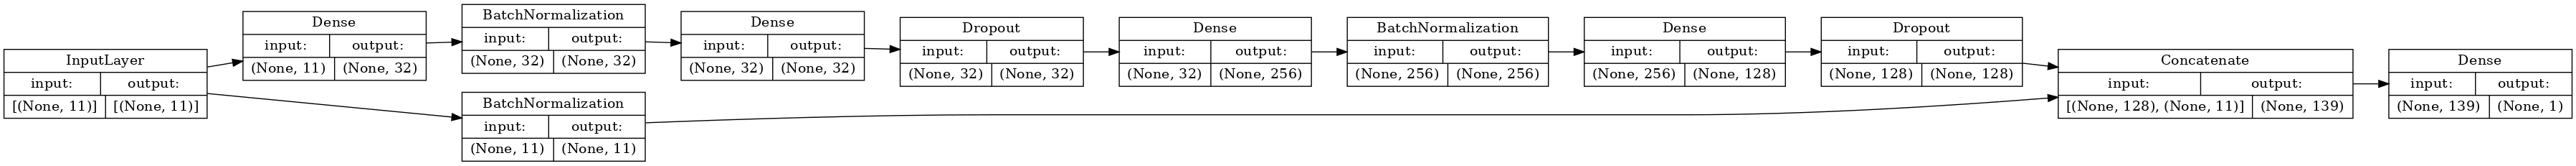

In [12]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, dpi=100, rankdir='LR')

In [13]:
# 예측값 얻기
pred = model.predict(X_test).flatten()

# submission 화일 생성
filename = 'submission.csv'
pd.DataFrame({'ID':test_id, 'Salary':pred}).to_csv(filename, index=False)

print(f'{filename} is ready to submit.')

submission.csv is ready to submit.
